In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load and prepare the data
# Load the dataset
data = pd.read_csv('sonar data (1).csv', header=None)





In [ ]:
data.shape

(208, 61)

In [ ]:
# Display first few rows
print(data.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [ ]:
# Separate features and target
X = data.drop(60, axis=1)
y = data[60]

In [ ]:

# Convert target to binary (R=0, M=1)
y = y.map({'R': 0, 'M': 1})

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: KNN Model


In [ ]:
# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(knn.get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
# Print the algorithm name chosen by the model
if knn.algorithm == 'auto':
    print(f"Algorithm selected: {knn._fit_method}")
else:
    print(f"Algorithm selected: {knn.algorithm}")

Algorithm selected: brute


In [ ]:
# Make predictions
y_pred_knn = knn.predict(X_test)


In [ ]:
# Evaluate KNN model
print("KNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model Performance:
Accuracy: 0.9047619047619048
Precision: 0.9583333333333334
Recall: 0.8846153846153846

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.96      0.88      0.92        26

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



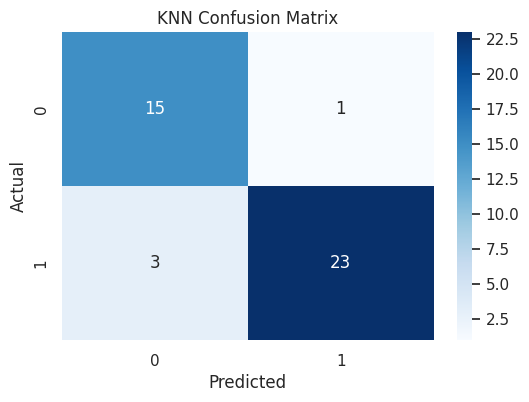

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import random

sample_indices = random.sample(range(len(X_test)), 5)

# Verify predictions
print("\n=== Verification of Random Samples ===")
print("{:<10} {:<15} {:<15}".format("Index", "Actual", "Predicted"))
print("-"*40)
for idx in sample_indices:
    actual = "Mine" if y_test.iloc[idx] == 1 else "Rock"
    predicted = "Mine" if y_pred_knn[idx] == 1 else "Rock"
    print("{:<10} {:<15} {:<15}".format(idx, actual, predicted))


=== Verification of Random Samples ===
Index      Actual          Predicted      
----------------------------------------
39         Mine            Mine           
28         Mine            Mine           
25         Rock            Rock           
38         Rock            Rock           
12         Mine            Mine           


#To reduce the risk of missing actual mines, we lowered the classification threshold to 0.3. This improved the model's recall and reduced false negatives, making mine detection more sensitive and reliable, even if it slightly increased false positives.

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.90      1.00      0.95        26

    accuracy                           0.93        42
   macro avg       0.95      0.91      0.92        42
weighted avg       0.94      0.93      0.93        42


Confusion Matrix:
[[13  3]
 [ 0 26]]

Accuracy: 92.86%
Recall (Mine): 1.00
Precision (Mine): 0.90
F1 Score (Mine): 0.95


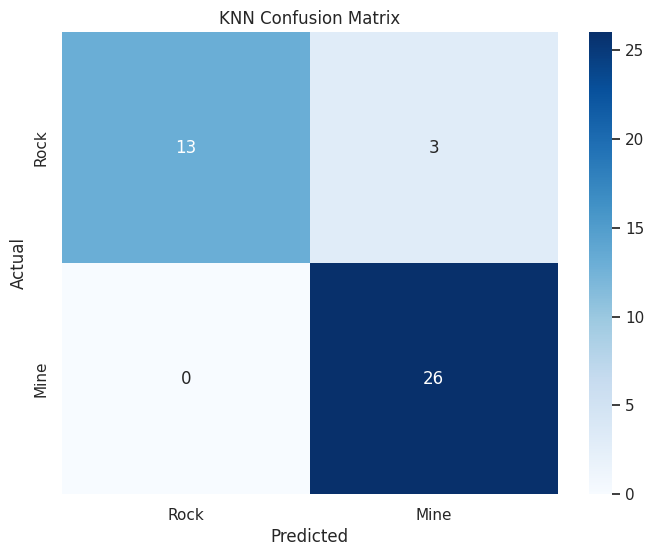

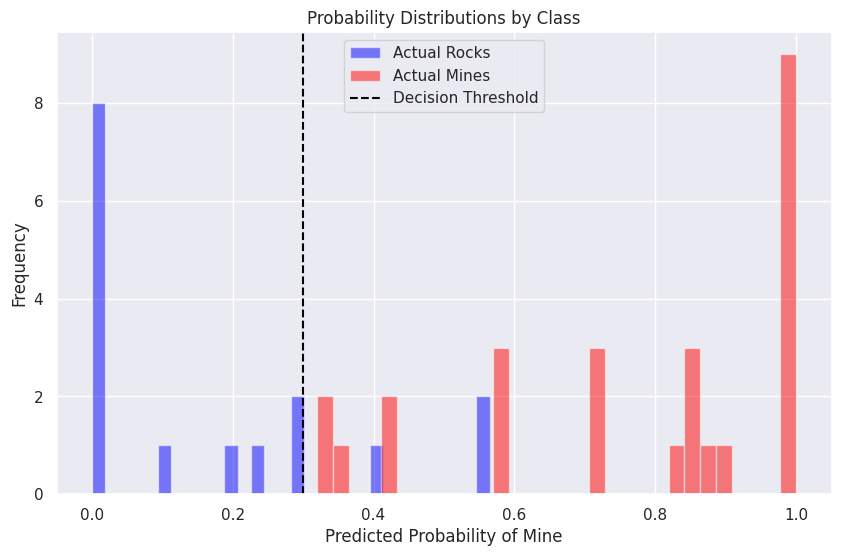

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load your data (replace this with your actual data loading)
# Assuming you have X (features) and y (target) loaded
# X, y = load_your_data()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Resampling with SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function for prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1  # Show progress
)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

# Get the best model
best_knn = grid_search.best_estimator_
print("Best KNN Parameters:", grid_search.best_params_)

# Predict probabilities
y_proba = best_knn.predict_proba(X_test)

# Set custom threshold (adjust as needed)
threshold = 0.3
y_pred_custom = np.where(y_proba[:, 1] >= threshold, 1, 0)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)
print("\nConfusion Matrix:")
print(cm)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_custom)
recall_mine = recall_score(y_test, y_pred_custom, pos_label=1)
precision_mine = precision_score(y_test, y_pred_custom, pos_label=1)
f1_mine = f1_score(y_test, y_pred_custom, pos_label=1)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Recall (Mine): {recall_mine:.2f}")
print(f"Precision (Mine): {precision_mine:.2f}")
print(f"F1 Score (Mine): {f1_mine:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rock', 'Mine'],
            yticklabels=['Rock', 'Mine'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot probability distributions
plt.figure(figsize=(10, 6))
plt.hist(y_proba[y_test == 0][:, 1], bins=30, alpha=0.5, label='Actual Rocks', color='blue')
plt.hist(y_proba[y_test == 1][:, 1], bins=30, alpha=0.5, label='Actual Mines', color='red')
plt.axvline(x=threshold, color='black', linestyle='--', label='Decision Threshold')
plt.title('Probability Distributions by Class')
plt.xlabel('Predicted Probability of Mine')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 4: Random Forest Model


In [ ]:
#Create and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate Random Forest model
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.8571428571428571
Precision: 0.9166666666666666
Recall: 0.8461538461538461

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.92      0.85      0.88        26

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



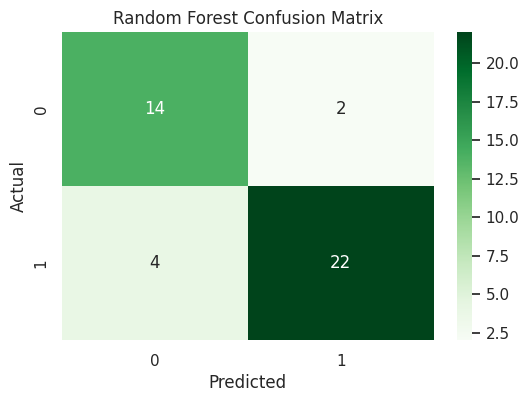

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import random

sample_indices = random.sample(range(len(X_test)), 5)

# Verify predictions
print("\n=== Verification of Random Samples ===")
print("{:<10} {:<15} {:<15}".format("Index", "Actual", "Predicted"))
print("-"*40)
for idx in sample_indices:
    actual = "Mine" if y_test.iloc[idx] == 1 else "Rock"
    predicted = "Mine" if y_pred_rf[idx] == 1 else "Rock"
    print("{:<10} {:<15} {:<15}".format(idx, actual, predicted))


=== Verification of Random Samples ===
Index      Actual          Predicted      
----------------------------------------
32         Rock            Rock           
40         Rock            Rock           
17         Mine            Mine           
4          Mine            Rock           
33         Mine            Mine           


#To reduce the risk of missing actual mines, we lowered the classification threshold to 0.3. This improved the model's recall and reduced false negatives, making mine detection more sensitive and reliable, even if it slightly increased false positives.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

# Resampling with SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Random Forest with class weights to handle class imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter tuning with GridSearchCV to find the best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)

# Get the best model
model = grid_search.best_estimator_
print(model)
# Predict probabilities instead of labels
y_proba = model.predict_proba(X_test)

# Set custom threshold (lower threshold to predict 'Mine' more often)
threshold = 0.3  # Further lower threshold to predict 'Mine' more often
y_pred_custom = np.where(y_proba[:, list(model.classes_).index(1)] >= threshold, 1, 0)

# Show classification report
print(classification_report(y_test, y_pred_custom))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_custom, labels=[0, 1])
print("\nConfusion Matrix:\n", cm)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred_custom)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Calculate and display recall for 'Mine' class (zero false negatives)
recall_mine = recall_score(y_test, y_pred_custom, pos_label=1)
print(f"Recall (Mine): {recall_mine:.2f}")

# Calculate and display precision for 'Mine' class
precision_mine = precision_score(y_test, y_pred_custom, pos_label=1)
print(f"Precision (Mine): {precision_mine:.2f}")

# Calculate and display F1 score for 'Mine' class
f1_mine = f1_score(y_test, y_pred_custom, pos_label=1)
print(f"F1 Score (Mine): {f1_mine:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=42)
              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.84      1.00      0.91        26

    accuracy                           0.88        42
   macro avg       0.92      0.84      0.86        42
weighted avg       0.90      0.88      0.88        42


Confusion Matrix:
 [[11  5]
 [ 0 26]]

Accuracy: 88.10%
Recall (Mine): 1.00
Precision (Mine): 0.84
F1 Score (Mine): 0.91


# Step 5: SVM Model

In [ ]:
# Create and train SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_svm = svm.predict(X_test)

In [ ]:
# Evaluate SVM model
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


In [ ]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import random

sample_indices = random.sample(range(len(X_test)), 5)

# Verify predictions
print("\n=== Verification of Random Samples ===")
print("{:<10} {:<15} {:<15}".format("Index", "Actual", "Predicted"))
print("-"*40)
for idx in sample_indices:
    actual = "Mine" if y_test.iloc[idx] == 1 else "Rock"
    predicted = "Mine" if y_pred_svm[idx] == 1 else "Rock"
    print("{:<10} {:<15} {:<15}".format(idx, actual, predicted))

# Step 6: Model Comparison

Model Comparison:
           Model  Accuracy  Precision    Recall
0            KNN  0.904762   0.958333  0.884615
1  Random Forest  0.857143   0.916667  0.846154
2            SVM  0.880952   0.956522  0.846154


<Figure size 1000x600 with 0 Axes>

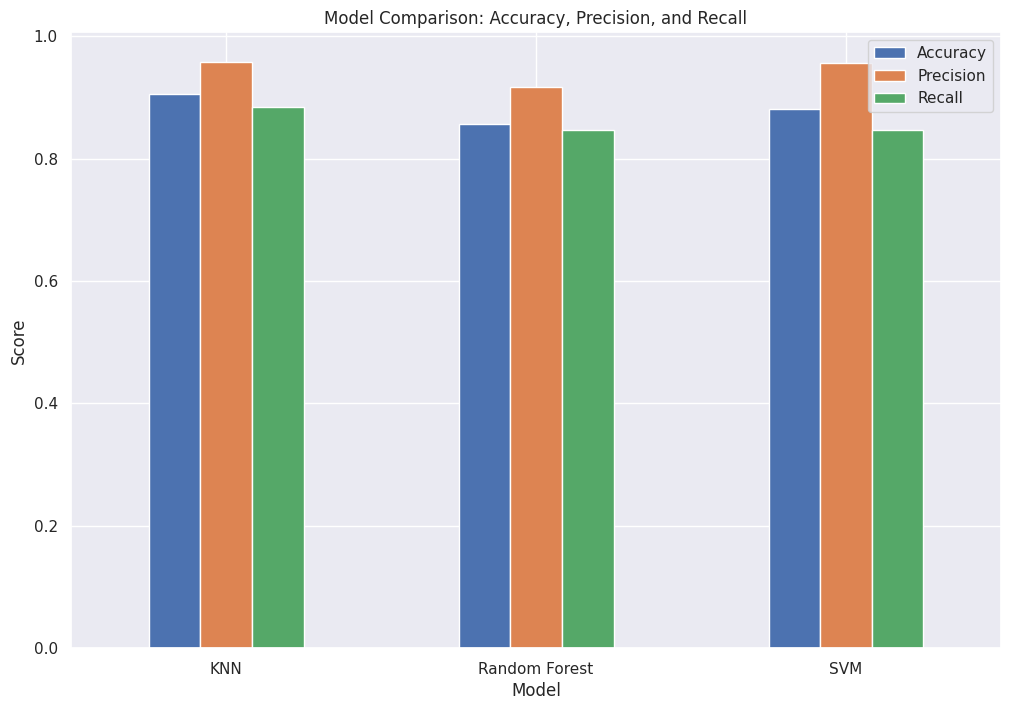

In [ ]:

# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_knn),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_knn),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_svm)]
})

# Display comparison
print("Model Comparison:")
print(comparison)

# Visual comparison
plt.figure(figsize=(10,6))
comparison.set_index('Model').plot(kind='bar')
plt.title('Model Comparison: Accuracy, Precision, and Recall')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

#Methods for increase KNN accuracy

Optimal K: 1 (Accuracy: 0.8496)


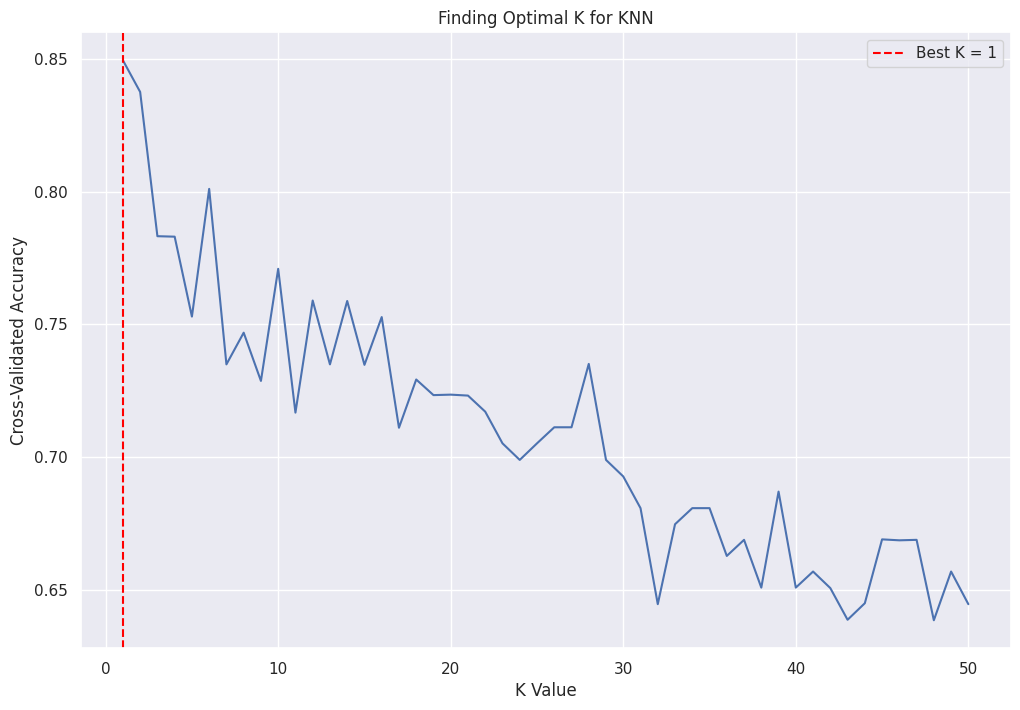

In [ ]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.model_selection import cross_val_score  # For cross-validation
import numpy as np  # For numerical operations

# Test K values from 1 to 50 to find the optimal number of neighbors
k_values = range(1, 51)  # Range of K values to test (1 to 50)
accuracies = []  # Store mean accuracy for each K

for k in k_values:
    # Initialize KNN with current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation on training data
    # - cv=5 splits data into 5 parts, uses 4 for training and 1 for validation (rotates)
    # - Returns an array of accuracy scores for each fold
    scores = cross_val_score(knn, X_train, y_train, cv=5)

    # Store the mean accuracy across all folds
    accuracies.append(scores.mean())

# Find the K with the highest mean accuracy
best_k = k_values[np.argmax(accuracies)]  # np.argmax returns the index of the max value
print(f"Optimal K: {best_k} (Accuracy: {max(accuracies):.4f})")

# Optional: Plot accuracy vs K values to visualize the trend
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies)
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal K for KNN')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.show()

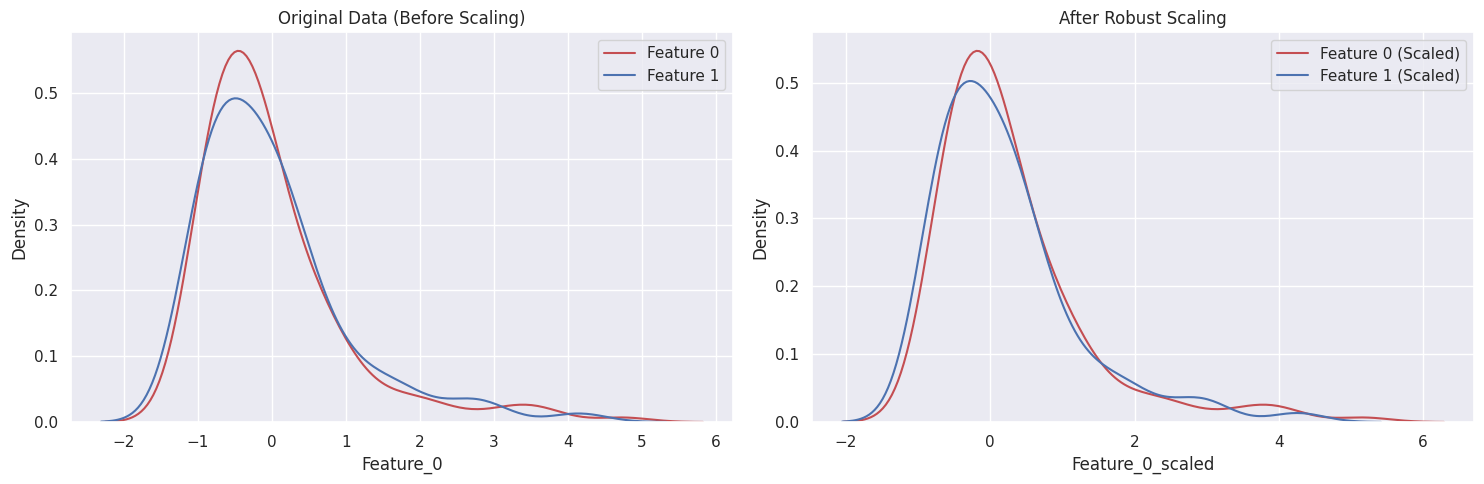

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# Apply Robust Scaling
rb_scaler = RobustScaler()
X_train_scaled = rb_scaler.fit_transform(X_train)
X_test_scaled = rb_scaler.transform(X_test)

# Convert to DataFrame for easier plotting (assuming >=2 features)
original_train_df = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
scaled_train_df = pd.DataFrame(X_train_scaled, columns=[f"Feature_{i}_scaled" for i in range(X_train_scaled.shape[1])])

# Plot distributions (using the first two features)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Before Scaling
sns.kdeplot(data=original_train_df, x="Feature_0", ax=ax1, color='r', label='Feature 0')
sns.kdeplot(data=original_train_df, x="Feature_1", ax=ax1, color='b', label='Feature 1')
ax1.set_title('Original Data (Before Scaling)')
ax1.legend()

# After Robust Scaling
sns.kdeplot(data=scaled_train_df, x="Feature_0_scaled", ax=ax2, color='r', label='Feature 0 (Scaled)')
sns.kdeplot(data=scaled_train_df, x="Feature_1_scaled", ax=ax2, color='b', label='Feature 1 (Scaled)')
ax2.set_title('After Robust Scaling')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
def hybrid_metric(x, y):
    euclidean = np.sqrt(np.sum((x - y)**2))
    manhattan = np.sum(np.abs(x - y))
    return 0.7*euclidean + 0.3*manhattan  # Weighted combo

best_knn = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='distance',
    metric=hybrid_metric,
    algorithm='brute'
)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)
print(f"Accuracy with hybrid metric: {accuracy_score(y_test, y_pred):.4f}")

Accuracy with hybrid metric: 0.9762


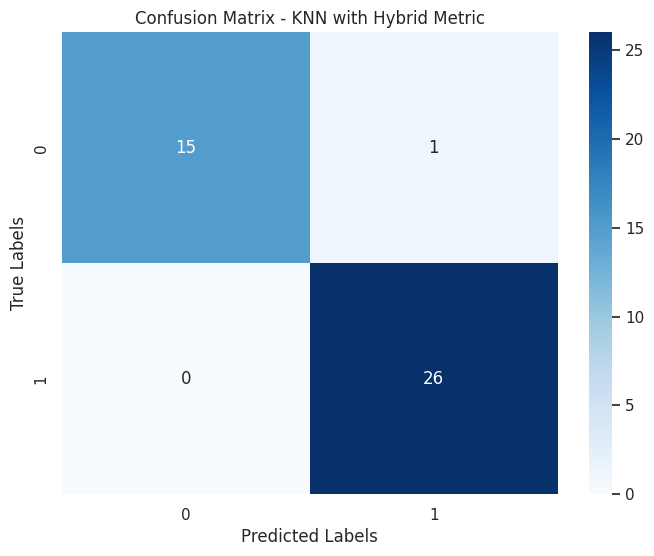

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        26

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.97        42
weighted avg       0.98      0.98      0.98        42



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = best_knn.classes_

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN with Hybrid Metric')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in labels]))


#Visualization

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import learning_curve

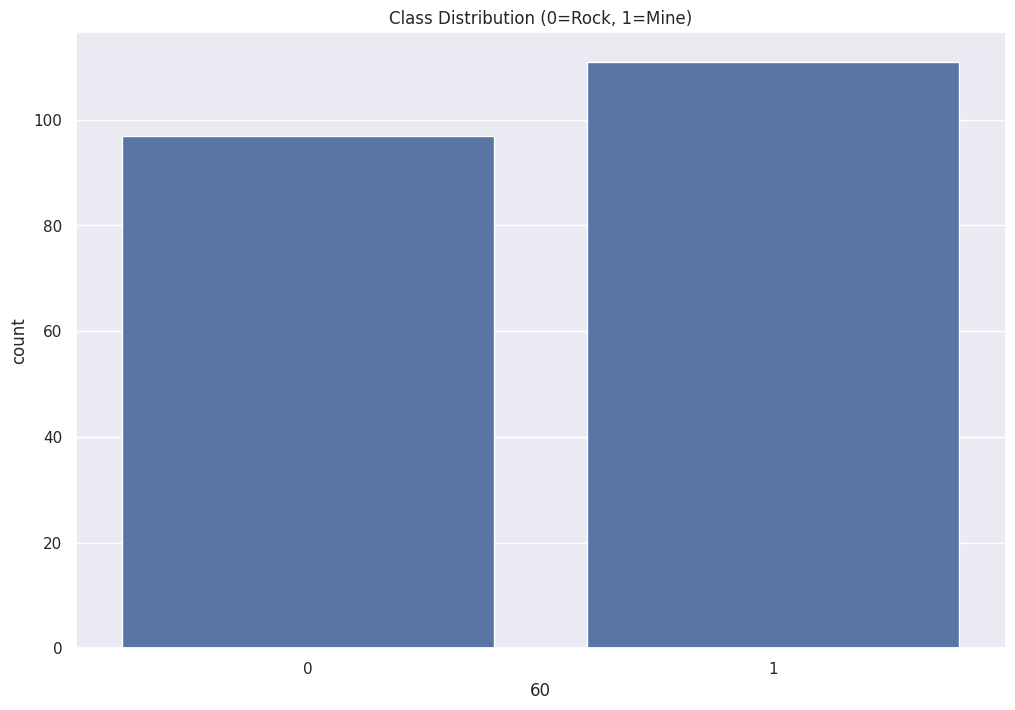

In [ ]:
# Step 7: All Visualizations
# Set style for all plots
#plt.style.use('seaborn') # Incorrect: 'seaborn' is not a built-in Matplotlib style
import seaborn as sns
sns.set_theme() # Use Seaborn's set_theme() to apply its style
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Data Distribution
plt.figure()
sns.countplot(x=y)
plt.title('Class Distribution (0=Rock, 1=Mine)')
plt.show()

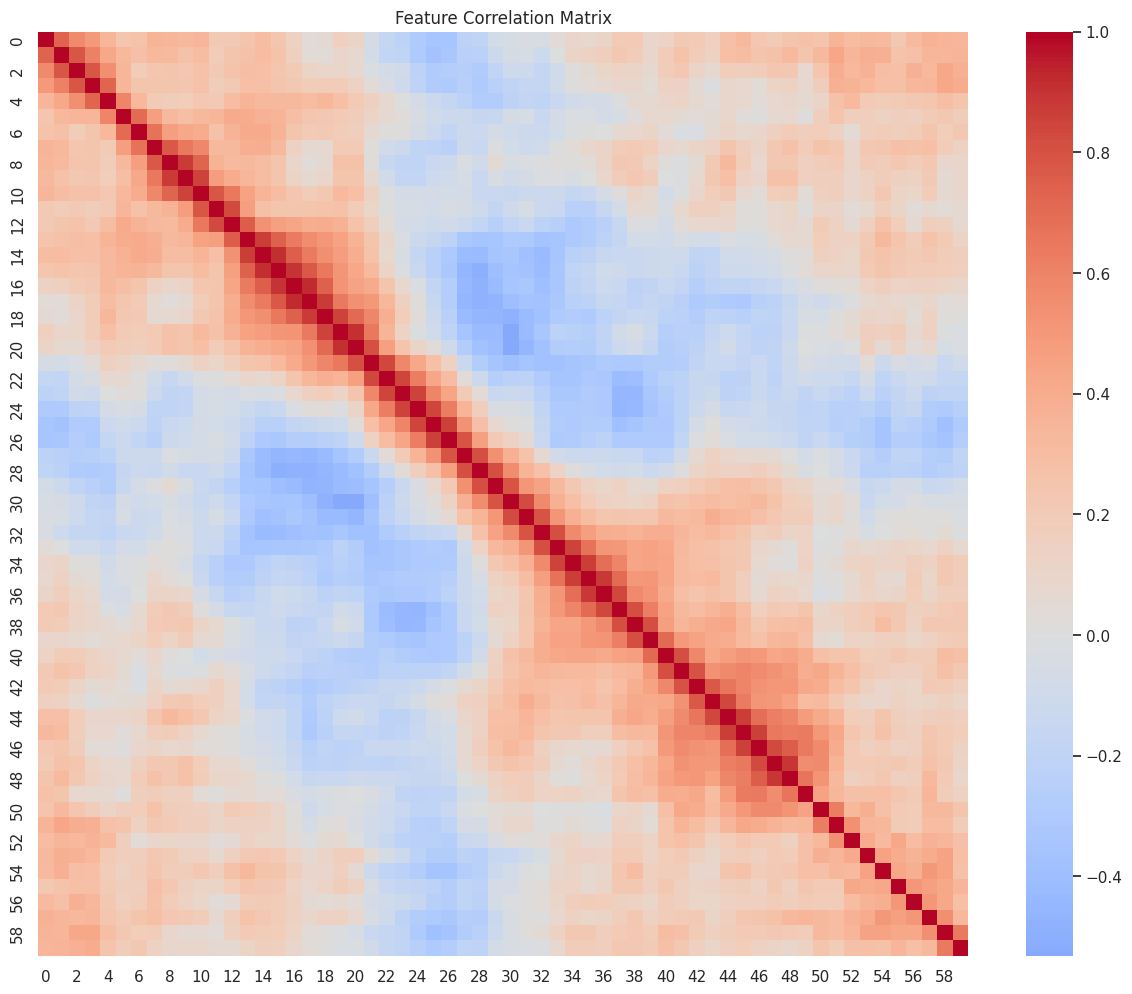

In [ ]:
# 2. Correlation Matrix
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

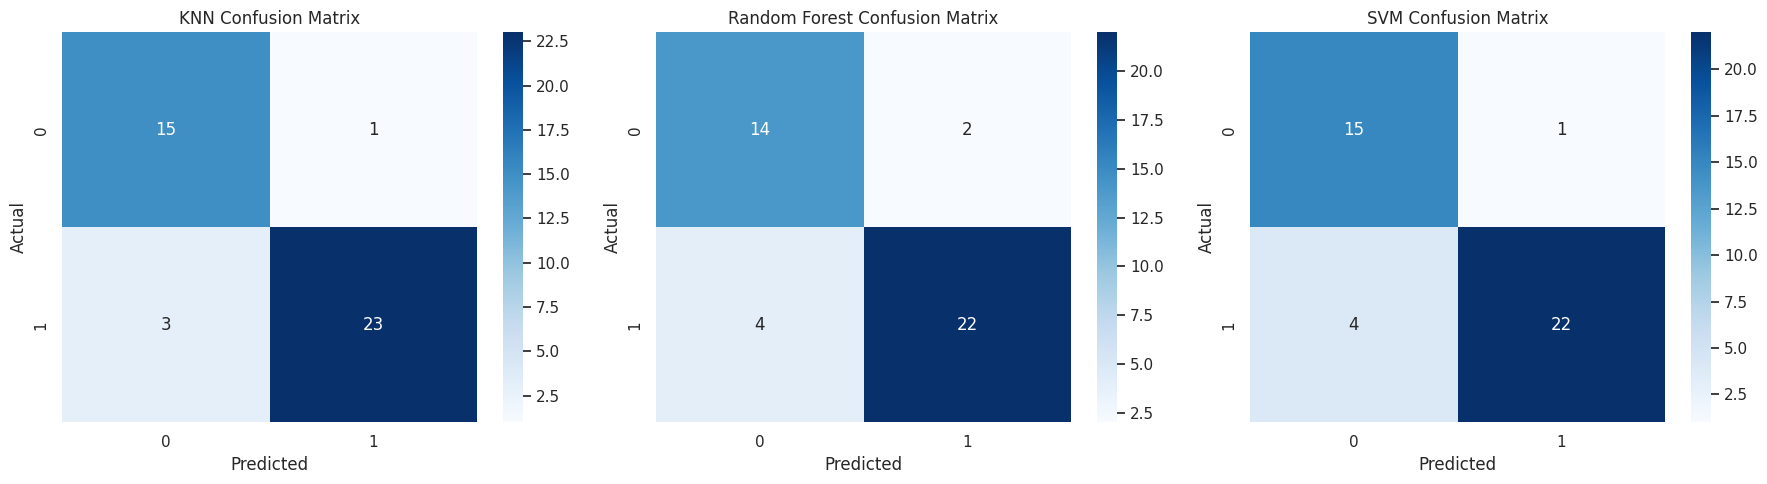

In [ ]:
# 4. Confusion Matrices
# Define the 'results' dictionary
results = {
    'KNN': {'cm': cm_knn},
    'Random Forest': {'cm': cm_rf},
    'SVM': {'cm': cm_svm}
}

fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['cm'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

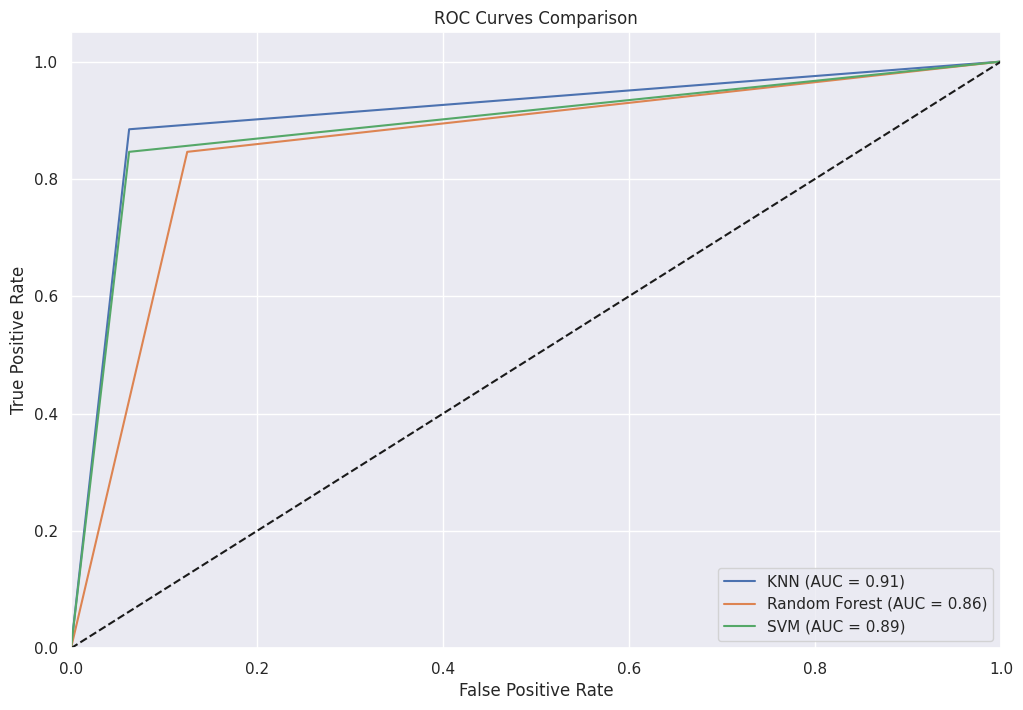

In [ ]:
# 5. ROC Curves
plt.figure()

# Store predictions for each model
results['KNN']['y_pred'] = y_pred_knn
results['Random Forest']['y_pred'] = y_pred_rf
results['SVM']['y_pred'] = y_pred_svm


for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

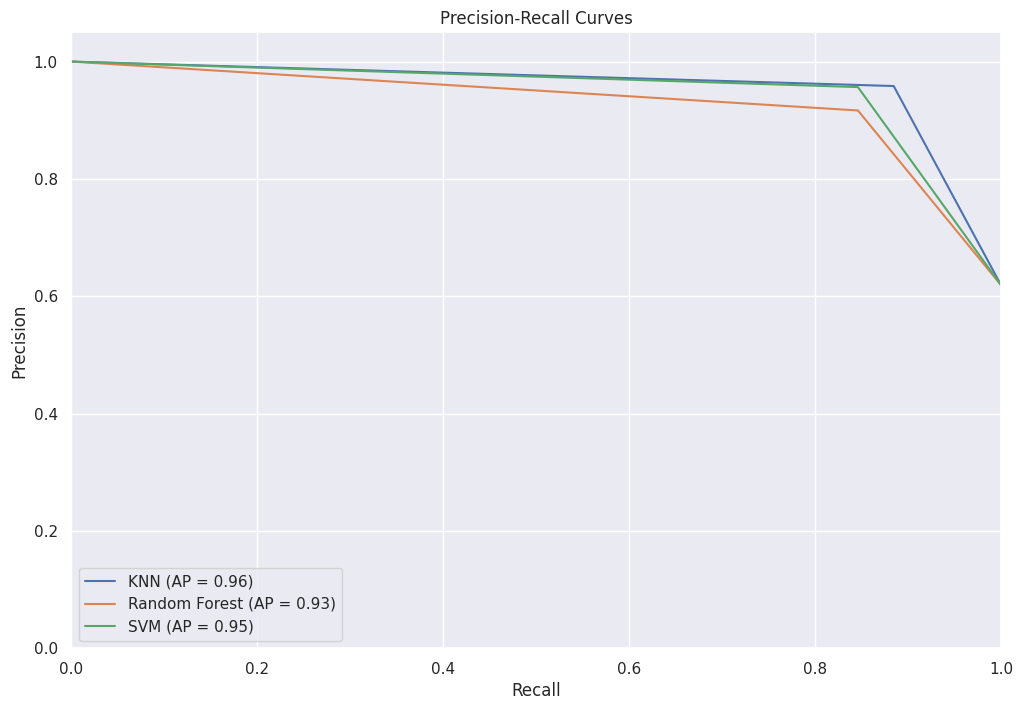

In [ ]:
# 6. Precision-Recall Curves
plt.figure()
for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['y_pred'])
    avg_precision = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()


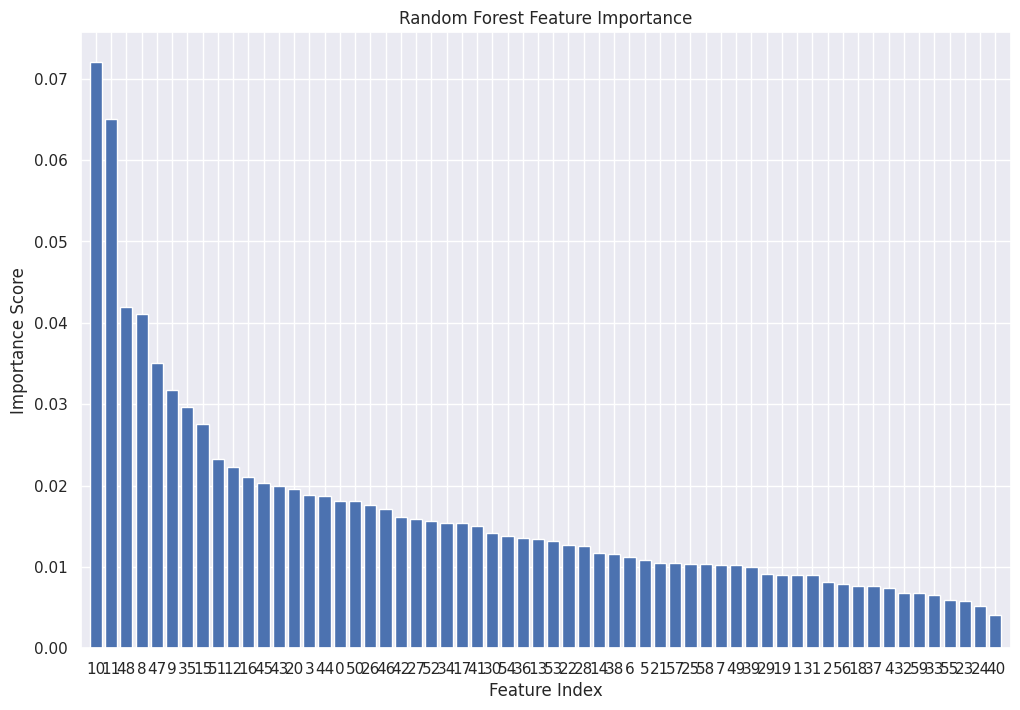

In [ ]:
# 7. Feature Importance (Random Forest only)
plt.figure()
# Step 1: Re-train the RandomForestClassifier
rf.fit(X_train, y_train)  # Fit the model again

# Calculate and store feature importances
importances = rf.feature_importances_  # Access feature importances from the trained model (rf)
results['Random Forest']['importances'] = importances # Store in 'results'

indices = np.argsort(importances)[::-1]
plt.title('Random Forest Feature Importance')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()

<Figure size 1200x800 with 0 Axes>

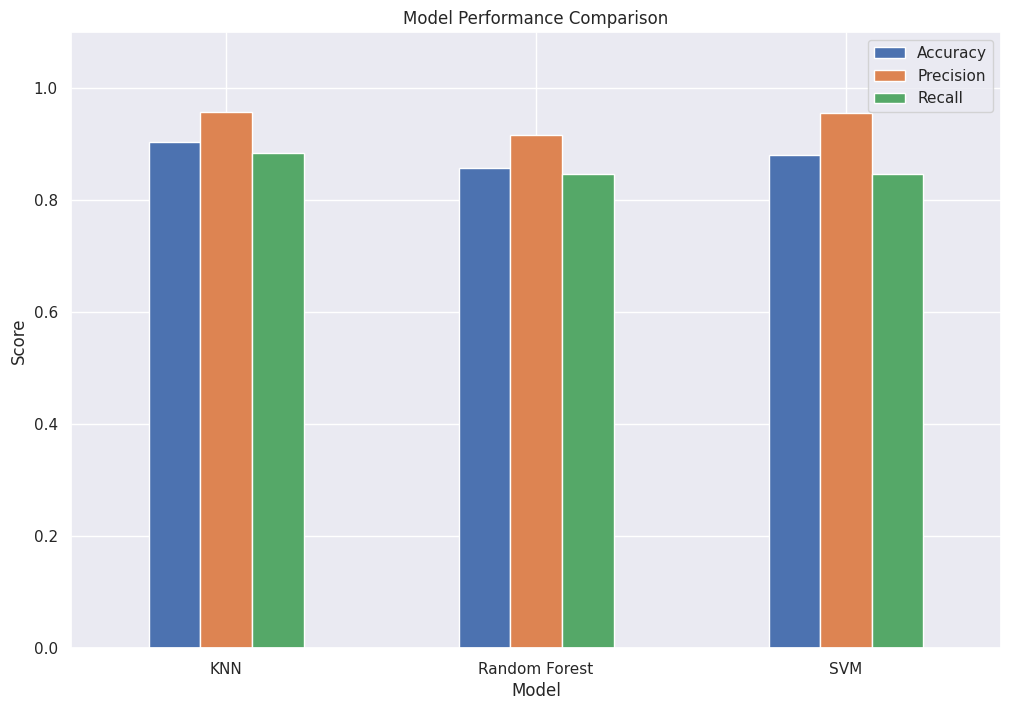

In [ ]:
# 8. Model Comparison Bar Plot
plt.figure()
comparison.set_index('Model').plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.show()

# 9. Parallel Coordinates Plot (Interactive)
fig = px.parallel_coordinates(comparison, color='Accuracy',
                             dimensions=['Accuracy', 'Precision', 'Recall'],
                             color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

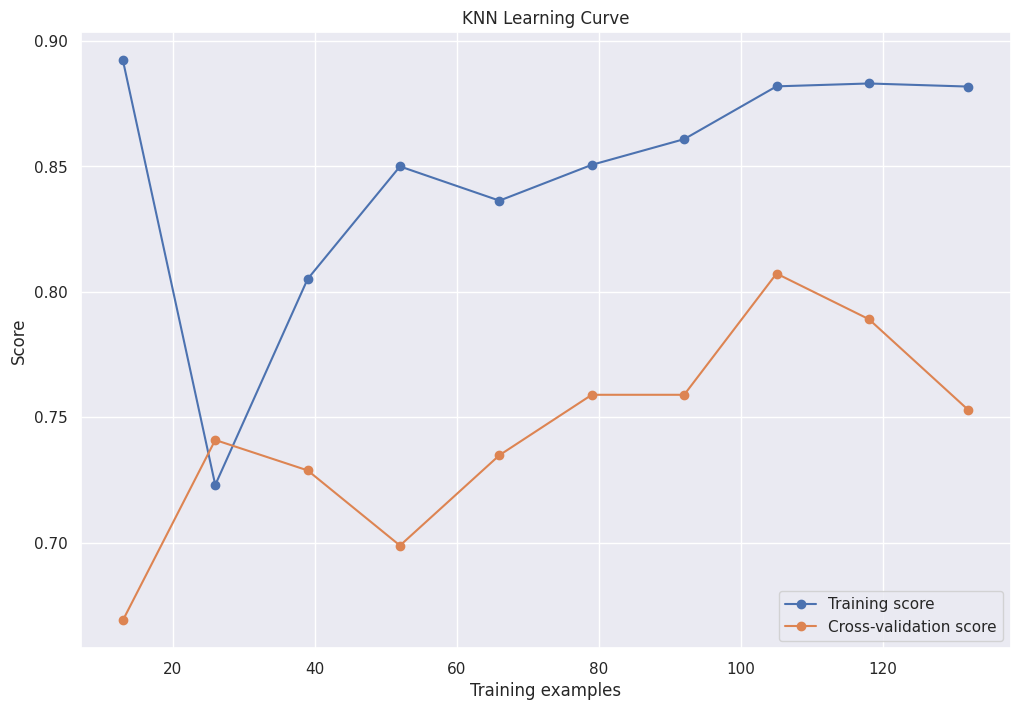

In [ ]:
# 10. Learning Curve (Example for KNN)
plt.figure()
# Use X_train and y_train for learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=5, # Changed X to X_train, y to y_train
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('KNN Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

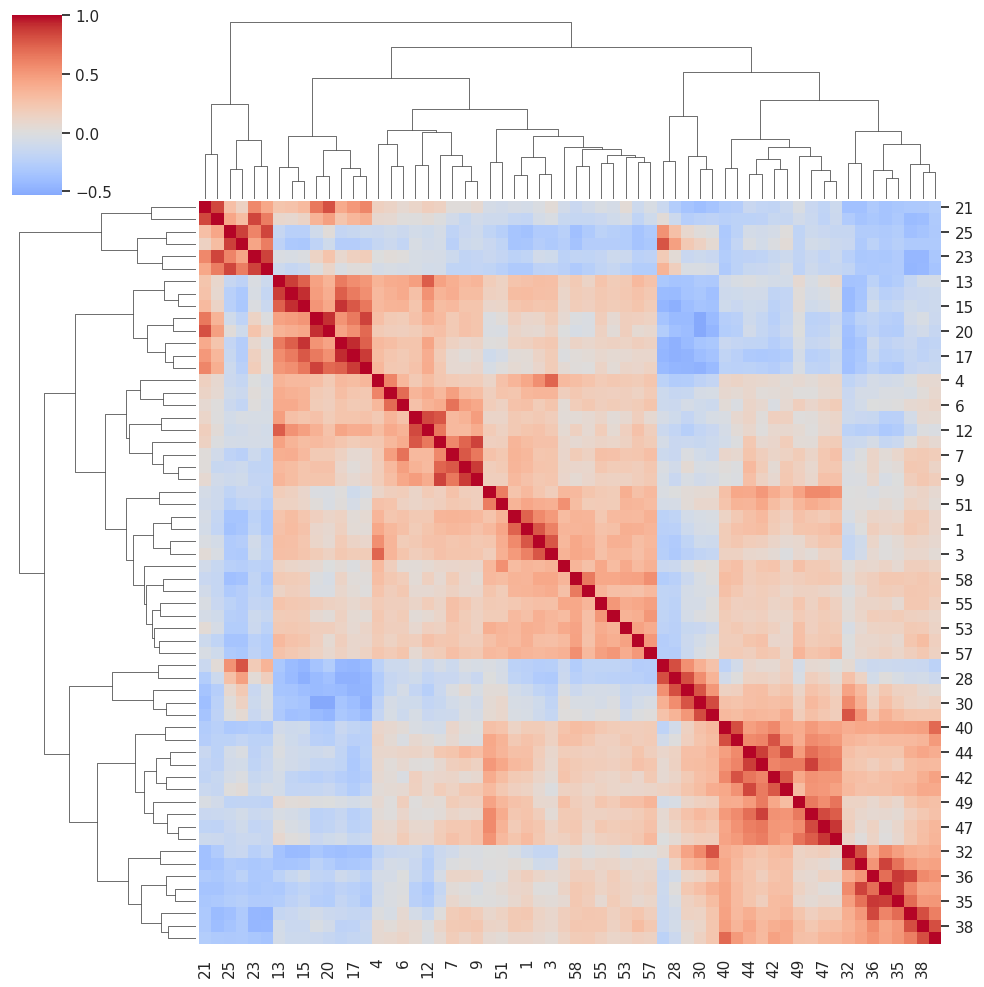

In [ ]:
plt.figure(figsize=(10, 8))
sns.clustermap(X.corr(), cmap='coolwarm', center=0)  # Adds dendrograms

In [ ]:
import joblib
joblib.dump(knn, 'knn_model.pkl') # Changed knn_model to knn
joblib.dump(rf, 'rf_model.pkl') # Changed rf_model to rf
joblib.dump(svm, 'svm_model.pkl') # Changed svm_model to svm
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
import joblib


joblib.dump((X_test, y_test), "test_data.pkl")


['test_data.pkl']

# Sonar Data Classification

This project aims to classify sonar signals as either a "Rock" or a "Mine" using various machine learning models. The dataset consists of 60 numerical features representing the sonar signal and a target variable indicating whether the object is a rock or a mine.

## Project Steps:

1.  **Import Libraries**: Import necessary libraries for data manipulation, machine learning, and visualization.
2.  **Load and Prepare Data**: Load the sonar dataset, examine its dimensions and first few rows, separate features (X) and target (y), and convert the target variable to a binary format (0 for Rock, 1 for Mine).
3.  **Split and Scale Data**: Split the data into training and testing sets and standardize the features using `StandardScaler`.
4.  **KNN Model**:
    *   Train a K-Nearest Neighbors (KNN) model.
    *   Evaluate the model's performance using accuracy, precision, recall, and a confusion matrix.
    *   Implement hyperparameter tuning with GridSearchCV to find the best KNN parameters.
    *   Utilize SMOTE for handling class imbalance.
    *   Apply a custom threshold to the prediction probabilities to potentially improve recall for the 'Mine' class.
    *   Visualize the confusion matrix and probability distributions.
    *   Explore methods to improve KNN accuracy, including testing different K values and using Robust Scaling and a hybrid distance metric.
5.  **Random Forest Model**:
    *   Train a Random Forest classifier.
    *   Evaluate the model's performance using accuracy, precision, recall, and a confusion matrix.
    *   Implement hyperparameter tuning with GridSearchCV, considering class weights and different `max_features` strategies.
    *   Apply a custom threshold to the prediction probabilities.
    *   Visualize the confusion matrix.
6.  **SVM Model**:
    *   Train a Support Vector Machine (SVM) model with an RBF kernel.
    *   Evaluate the model's performance using accuracy, precision, recall, and a confusion matrix.
    *   Visualize the confusion matrix.
7.  **Model Comparison**:
    *   Create a table comparing the performance of the KNN, Random Forest, and SVM models based on accuracy, precision, and recall.
    *   Generate bar plots to visualize the model comparison.
    *   Generate ROC curves and Precision-Recall curves to compare model performance visually.
    *   Visualize feature importance for the Random Forest model.
    *   Generate a Learning Curve for the KNN model to assess its performance with varying training data size.
    *   Generate a clustermap of the feature correlation matrix.
8.  **Save Models and Data**: Save the trained models and the test data using `joblib` for future use.

## Dataset:

The dataset used in this project is `sonar data (1).csv`. It contains 208 instances and 61 attributes. The first 60 attributes are the sonar signal features, and the last attribute is the target variable ('R' for Rock, 'M' for Mine).

## Dependencies:

*   pandas
*   numpy
*   sklearn
*   seaborn
*   matplotlib
*   imblearn
*   plotly
*   joblib

## How to Run the Code:

1.  Ensure you have the required libraries installed (`pip install pandas numpy scikit-learn seaborn matplotlib imblearn plotly joblib`).
2.  Make sure the `sonar data (1).csv` file is in the same directory as the notebook or provide the correct path.
3.  Run the code cells sequentially in the provided Jupyter Notebook or Python script.

## Results:

The notebook provides the performance metrics (accuracy, precision, recall) and confusion matrices for each model. It also includes visualizations for comparing the models, exploring data characteristics, and analyzing model behavior. The best performing model and its optimal hyperparameters are identified through hyperparameter tuning.